# Simple Clustering Exercise

The standard k-means algorithm isn't directly applicable to categorical data. The sample space for categorical data is discrete, and doesn't have a natural origin. An Euclidean distance function on such a space isn't really meaningful. K-modes is a variation of k-means which is suitable for categorical data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from kmodes.kmodes import KModes

plt.style.use('seaborn-deep')

%matplotlib inline
# Eliminates output truncation
pd.options.display.max_columns = 999
# Use seaborn style defaults and set the default figure size
pd.set_option('display.max_rows', None)
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 6)})

os.chdir('C:\\Users\orion.darley\\Desktop\\ML HW\\')
cwd = os.getcwd()

In [3]:
def remove_nan_and_zeroes_from_columns(df, variable):
    filtered_df  = df.replace([np.inf, -np.inf], np.nan)
    filtered_df = filtered_df[(filtered_df[variable].notnull()) & (filtered_df[variable] >= 1)]
    return filtered_df

### Load

In [4]:
url = 'https://raw.githubusercontent.com/OrionDarley/Public-Other/master/ecommerce%20clustering/Worksheet%20in%20Problem_Statement.csv'
df = pd.read_csv(url, error_bad_lines=False)

### Data Prep

In [5]:
print(df.describe())
print('----------------------')
print(df.Interests.value_counts())
print('----------------------')
print(df.Gender.value_counts())
print('----------------------')
print(df.shape)
print(df.isnull().sum())
print(df.info())

       Unnamed: 0          Age  Annual Income  Total Spending
count  1600.00000  1598.000000    1596.000000     1600.000000
mean    799.50000    37.895494     187.129699     2575.600781
std     462.02453    16.226009    5004.797654     1453.083432
min       0.00000    14.000000    -100.000000     -102.500000
25%     399.75000    28.000000      39.000000     1383.750000
50%     799.50000    35.000000      65.000000     2511.250000
75%    1199.25000    47.000000      81.000000     3843.750000
max    1599.00000   350.000000  200000.000000     5176.250000
----------------------
Entertainment      139
Hiking             137
Travel             132
Reading            131
Yoga               116
Crafts             115
Camping            108
Technology         102
Photography         98
Exercise            97
Music               92
Art                 88
Gaming              71
Strategic games     57
Sports              37
Pets                28
Automobiles         28
Cooking             19
Garde

In [6]:
#Remove data errors, negative values, zeros
df['Annual Income'] = df['Annual Income'].mask(df['Annual Income'] == 200000, 0)
df['Annual Income'] = df['Annual Income'].mask(df['Annual Income'] <= 0, 0)
df['Total Spending'] = df['Total Spending'].mask(df['Total Spending'] <= 0, 0)
df['Age'] = df['Age'].mask(df['Age'] >= 100, 0)
df = remove_nan_and_zeroes_from_columns(df, 'Age')
df = remove_nan_and_zeroes_from_columns(df, 'Annual Income')
df = remove_nan_and_zeroes_from_columns(df, 'Total Spending')
df = df.drop(['Unnamed: 0'],axis = 1)
df.describe()

,Age,Annual Income,Total Spending
count,1583.000000,1583.000000,1583.000000
mean,37.569172,61.943146,2585.615919
std,13.232153,28.755595,1446.813956
min,14.000000,3.000000,51.250000
25%,28.000000,39.000000,1435.000000
50%,35.000000,65.000000,2562.500000
75%,47.000000,81.000000,3843.750000
max,73.000000,158.000000,5176.250000


In [7]:
dfcat = df[['Gender', 'Interests']]
dfnum = df.drop(['Gender', 'Interests'], axis = 1)

### EDA

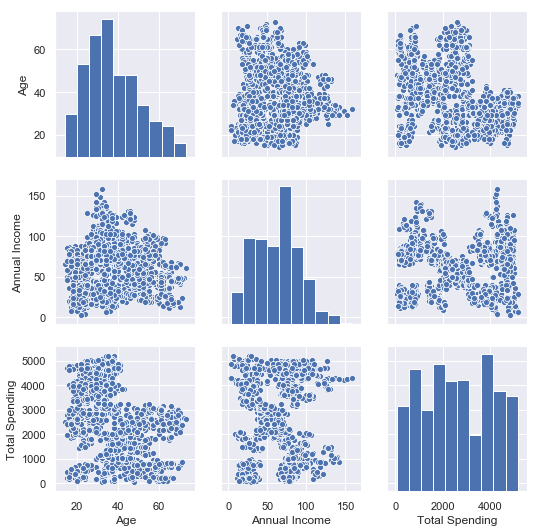

In [8]:
# Basic correlogram
sns.pairplot(df)

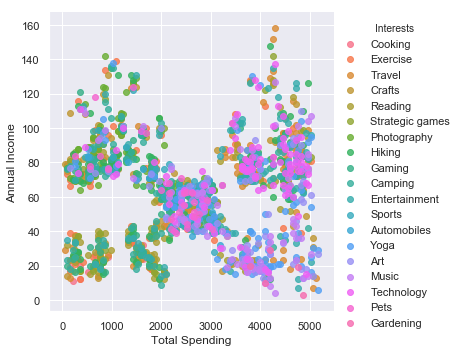

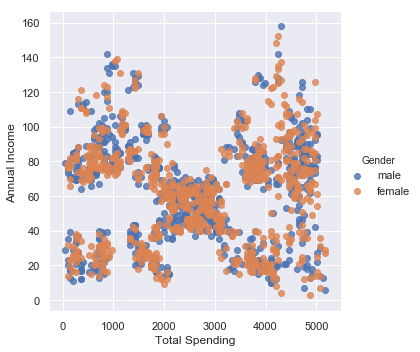

In [9]:
# Use the 'hue' argument to provide a factor variable
# sns.set(rc={'figure.figsize':(24,15)})
print(sns.lmplot(x='Total Spending', y="Annual Income", data=df, fit_reg=False, hue='Interests', legend=True))
print(sns.lmplot(x='Total Spending', y="Annual Income", data=df, fit_reg=False, hue='Gender', legend=True))
#sns.plt.show()


AxesSubplot(0.125,0.125;0.775x0.755)


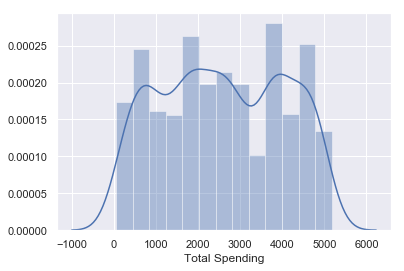

In [10]:
print(sns.distplot(df['Total Spending']))

AxesSubplot(0.125,0.125;0.775x0.755)


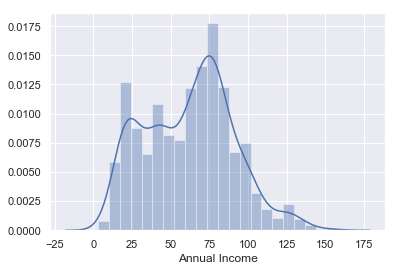

In [11]:
print(sns.distplot(df['Annual Income']))

AxesSubplot(0.125,0.125;0.775x0.755)


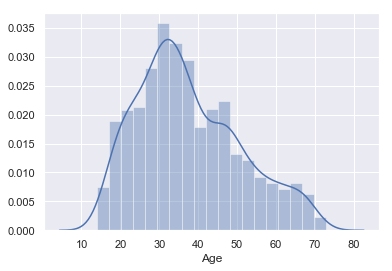

In [12]:
print(sns.distplot(df['Age']))

### More Data Prep

In [13]:
df_new = df.copy()
df_new['age_bin'] = pd.cut(df_new['Age'], [0, 20, 30, 40, 50, 60, 70, 80], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80'])
df_new = df_new.drop('Age',axis = 1)

In [14]:
df_new['income_bin'] = pd.cut(df_new['Annual Income'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100',
                                     '100-110','110-120','120-130', '130-140','140-150','150-160'])
df_new = df_new.drop('Annual Income',axis = 1)

In [15]:
df_new['spending_bin'] = pd.cut(df_new['Total Spending'], [0, 1000, 2000, 3000, 4000, 5000, 6000], 
                              labels=['0-1000', '1000-2000','2000-3000','3000-4000','4000-5000','5000-6000'])
df_new = df_new.drop('Total Spending',axis = 1)

In [16]:
df_new2 = df_new.copy()

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_new2 = df_new.apply(le.fit_transform)
df_new2.head(1000)

,Gender,Interests,age_bin,income_bin,spending_bin
0,1,3,1,0,0
1,1,6,2,0,0
2,1,17,5,0,0
3,1,4,5,0,0
4,0,17,4,7,0
6,1,17,3,7,0
7,0,17,4,7,0
8,0,13,5,7,0
9,0,13,4,8,0
10,0,15,4,7,0


In [17]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_new2)
fitClusters_cao

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 4967.0


array([1, 0, 1, ..., 0, 0, 1], dtype=uint16)

In [18]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df_new2.columns

# Mode of the clusters
clusterCentroidsDf

,Gender,Interests,age_bin,income_bin,spending_bin
0,0,5,2,12,3
1,1,9,1,11,2


In [19]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(df_new2)
fitClusters_huang

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 156, cost: 5066.0
Run 1, iteration: 2/100, moves: 0, cost: 5066.0


array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 5884.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 4967.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 4576.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 4312.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 35, cost: 4068.0
Run 1, iteration: 2/100, moves: 0, cost: 4068.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 33, cost: 3881.0
Run 1, iteration: 2/100, moves: 0, cost: 3881.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 29, cost: 3777.0
Run 1

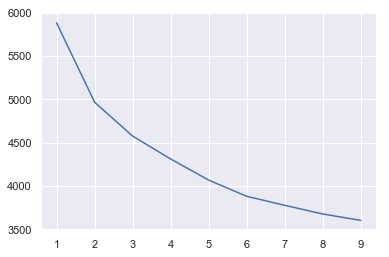

In [20]:
cost = []

for num_clusters in list(range(1,10)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df_new2)
    cost.append(kmode.cost_)
    
y = np.array([i for i in range(1,10,1)])
plt.plot(y,cost)

In [21]:
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_new2)
fitClusters_cao

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 4576.0


array([1, 2, 1, ..., 0, 0, 1], dtype=uint16)

### Post-processesing & prediction evaluation

In [22]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df_new, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index'], axis = 1)

combinedDf.head()

,Gender,Interests,age_bin,income_bin,spending_bin,cluster_predicted
0,male,Cooking,20-30,0-20,0-1000,1.0
1,male,Exercise,30-40,0-20,0-1000,2.0
2,male,Travel,60-70,0-20,0-1000,1.0
3,male,Crafts,60-70,0-20,0-1000,1.0
4,female,Travel,50-60,20-30,0-1000,0.0


In [23]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]

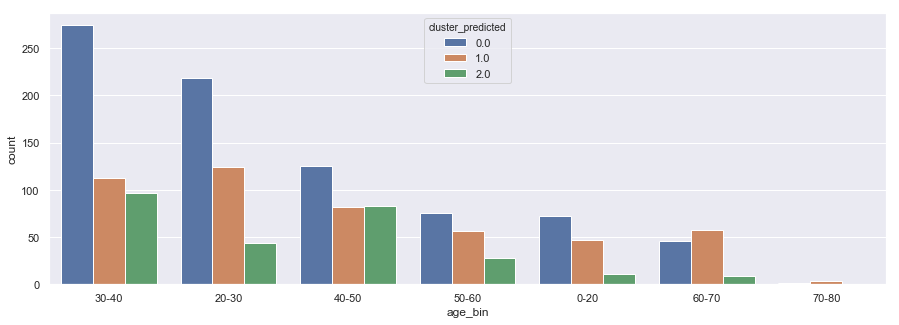

In [24]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['age_bin'],order=combinedDf['age_bin'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

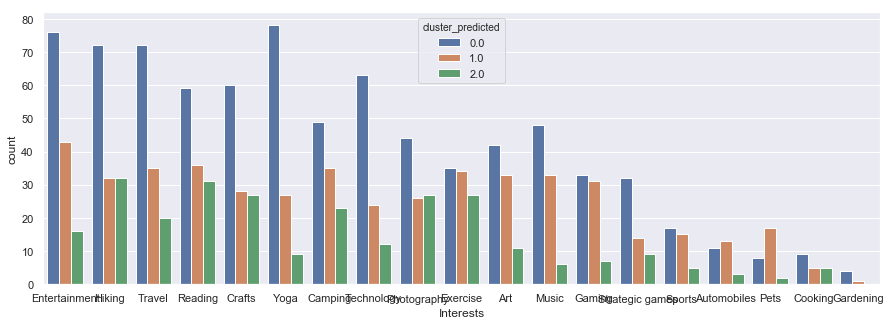

In [25]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Interests'],order=combinedDf['Interests'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

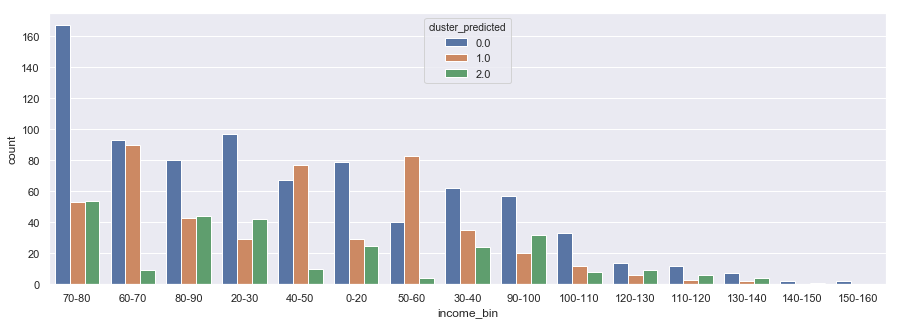

In [26]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['income_bin'],order=combinedDf['income_bin'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

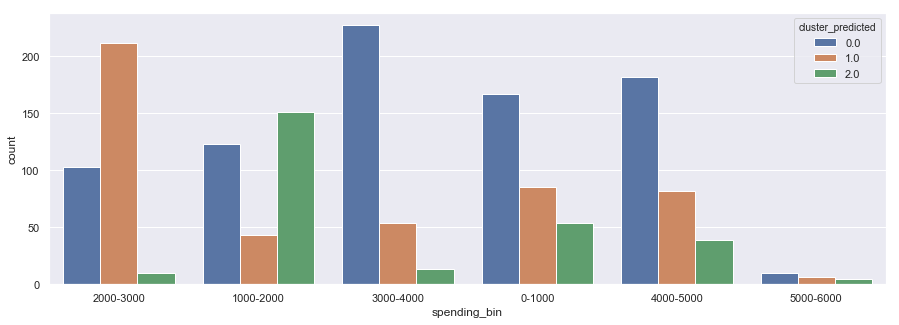

In [27]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['spending_bin'],order=combinedDf['spending_bin'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

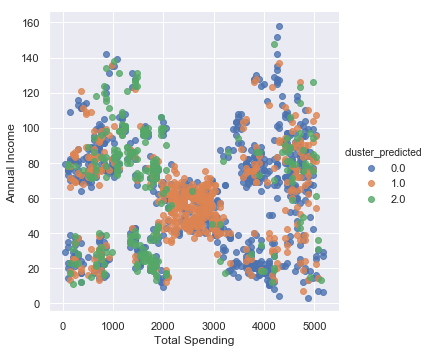

In [31]:
combinedDf2 = pd.concat([df, clustersDf], axis = 1).reset_index()
combinedDf2 = combinedDf2.drop(['index'], axis = 1)

combinedDf2.head()

print(sns.lmplot(x='Total Spending', y="Annual Income", data=combinedDf2, fit_reg=False, hue='cluster_predicted', legend=True))